In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\current_dataset.csv"

data = pd.read_csv(data_dir)

cols = ['Rainfall (mm)','Mean Temp. (*C)', 'RHmean (%)', 'SShr (hrs)', 'WD (deg)', 'WS (Km/hr)']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

data.info  

<bound method DataFrame.info of     Agricultural Zone   Month  Week  Rainfall (mm)  Mean Temp. (*C)  \
1               Bogra  August     1           63.3             29.3   
4               Dhaka    July     2           73.5             29.1   
5            Dinajpur    June     4           96.0             29.2   
6            Faridpur    July     4           84.5             29.0   
7              Khulna  August     3           76.5             29.1   
..                ...     ...   ...            ...              ...   
368            Khulna     May     1           17.5             30.1   
369           Jashore    June     1           49.5             30.7   
370          Faridpur   April     1           18.0             28.5   
371          Dinajpur   April     1            8.0             26.7   
372             Dhaka     May     1           21.0             29.0   

     RHmean (%)  SShr (hrs)  WD (deg)  WS (Km/hr) label  
1          83.6        35.0     137.0         6.3  Aman  

In [2]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
data.drop(columns=['label'], axis=1, inplace=True)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

data = pd.get_dummies(data, columns=['Agricultural Zone'], prefix='Zone')
data = pd.get_dummies(data, columns=['Month'], prefix='Month')
data = pd.get_dummies(data,columns=['Week'], prefix='Week')
data.head()

{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Wheat': 20, 'corn khorip-1': 21, 'garlic': 22, 'indian jujube': 23, 'jackfruit': 24, 'jute': 25, 'khorip green chilli': 26, 'khorip lau (grourd)': 27, 'khorip onion': 28, 'khorip pointed grourd': 29, 'khorip pumpkin Cucurbita': 30, 'licchi': 31, 'masterd seed': 32, 'papaya': 33, 'pineapple': 34, 'robi green chilli ': 35, 'robi lau (gourd)': 36, 'robi onion': 37, 'robi pointed gourd': 38, 'robi pumpkin Cucurbita': 39}


,Rainfall (mm),Mean Temp. (*C),RHmean (%),SShr (hrs),WD (deg),WS (Km/hr),label_encoded,Zone_Barisal,Zone_Bogra,Zone_Chittagonj,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Week_1,Week_2,Week_3,Week_4
1,63.3,29.3,83.6,35.0,137.0,6.3,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,73.5,29.1,83.0,32.0,159.0,5.9,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,96.0,29.2,83.0,31.0,121.0,3.7,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
6,84.5,29.0,85.5,32.0,180.0,5.6,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,76.5,29.1,85.6,31.0,170.0,6.5,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [3]:
original_features = [col for col in data.select_dtypes(include='number').columns
                     if not any(prefix in col for prefix in ['Zone_', 'Month_', 'Week_'])]

class_mean = data.groupby('label_encoded')[original_features].mean()
class_mean

,Rainfall (mm),Mean Temp. (*C),RHmean (%),SShr (hrs),WD (deg),WS (Km/hr),label_encoded
label_encoded,,,,,,,
0,71.542857,29.314286,83.814286,32.642857,152.571429,5.571429,0.0
1,33.153846,28.623077,74.296077,50.807692,170.384615,6.700000,1.0
2,2.360000,22.260000,66.380000,53.440000,206.600000,5.340000,2.0
3,40.775000,26.975000,79.550000,44.100000,189.125000,4.187500,3.0
4,3.142857,20.642857,68.985714,51.300000,205.000000,4.428571,4.0
5,6.828571,21.521429,73.892857,48.157143,191.214286,4.157143,5.0
6,26.222222,26.711111,70.233333,52.055556,195.333333,6.144444,6.0
7,49.120000,28.210000,81.750000,41.580000,185.000000,4.570000,7.0
8,14.500000,24.335714,75.635714,50.178571,184.785714,4.014286,8.0


In [4]:
original_features = [col for col in data.select_dtypes(include='number').columns
                     if not any(prefix in col for prefix in ['Zone_', 'Month_', 'Week_'])]

quartiles = data.groupby('label_encoded')[original_features].quantile([0.25, 0.5, 0.75])

quartiles = quartiles.unstack(level=1).T 
quartiles

label_encoded             0        1      2        3       4        5      6   \
Rainfall (mm)   0.25   59.65   18.000    1.3   32.375    2.00    0.000    6.0   
                0.50   73.50   21.000    2.0   47.000    4.00    2.900    9.5   
                0.75   80.50   48.000    3.5   55.500    4.00   12.125   25.5   
Mean Temp. (*C) 0.25   29.10   27.800   19.8   27.250   20.35   18.750   25.1   
                0.50   29.20   28.600   23.0   28.100   20.70   21.700   26.3   
                0.75   29.40   29.000   24.3   28.525   21.20   24.200   27.8   
RHmean (%)      0.25   83.00   69.800   61.5   76.700   67.75   72.600   63.9   
                0.50   83.60   76.449   64.7   82.200   68.70   74.600   71.0   
                0.75   84.90   78.100   70.4   82.900   70.90   75.375   76.4   
SShr (hrs)      0.25   31.50   48.000   49.0   40.250   49.00   43.000   51.0   
                0.50   32.00   51.500   55.0   43.400   51.50   49.250   52.0   
                0.75   33.75   53.000   57.5   47.750   52.30   53.875   55.0   
WD (deg)        0.25  133.00  148.000  205.0  186.250  191.50  165.500  178.0   
                0.50  159.00  175.000  207.0  193.500  211.00  200.000  208.0   
                0.75  171.00  192.000  209.0  203.750  214.50  211.250  223.0   
WS (Km/hr)      0.25    4.95    6.600    4.5    3.700    3.80    3.700    5.6   
                0.50    5.90    6.800    5.4    3.900    4.50    3.700    6.7   
                0.75    6.40    6.900    5.6    4.600    4.60    4.500    7.1   
label_encoded   0.25    0.00    1.000    2.0    3.000    4.00    5.000    6.0   
                0.50    0.00    1.000    2.0    3.000    4.00    5.000    6.0   
                0.75    0.00    1.000    2.0    3.000    4.00    5.000    6.0   

label_encoded              7        8        9   ...     30      31     32  \
Rainfall (mm)   0.25   35.375    1.000    2.525  ...    5.5    0.00    0.0   
                0.50   55.500    1.500    3.500  ...   11.5    0.50    1.5   
                0.75   66.750   25.750    4.375  ...   20.0    1.00   10.0   
Mean Temp. (*C) 0.25   28.000   21.550   19.175  ...   23.7   17.15   22.3   
                0.50   28.550   23.300   19.650  ...   27.0   17.70   23.0   
                0.75   28.975   26.875   20.025  ...   28.1   18.15   25.3   
RHmean (%)      0.25   80.000   73.000   69.875  ...   66.2   72.70   71.7   
                0.50   82.650   74.050   70.150  ...   70.0   73.30   73.0   
                0.75   83.775   78.400   70.900  ...   71.2   75.15   74.3   
SShr (hrs)      0.25   36.000   49.000   46.625  ...   49.0   38.50   48.7   
                0.50   40.250   51.750   49.250  ...   54.0   41.00   53.0   
                0.75   48.200   54.000   50.475  ...   56.0   43.00   54.8   
WD (deg)        0.25  163.500  177.750  196.000  ...  173.0  161.50  175.0   
                0.50  191.500  190.500  211.000  ...  190.0  199.00  186.0   
                0.75  200.750  200.500  231.250  ...  209.0  227.50  205.0   
WS (Km/hr)      0.25    4.025    3.700    3.625  ...    5.0    3.70    3.7   
                0.50    4.350    3.750    3.800  ...    5.2    3.70    3.7   
                0.75    5.200    4.175    4.450  ...    6.7    4.10    4.2   
label_encoded   0.25    7.000    8.000    9.000  ...   30.0   31.00   32.0   
                0.50    7.000    8.000    9.000  ...   30.0   31.00   32.0   
                0.75    7.000    8.000    9.000  ...   30.0   31.00   32.0   

label_encoded             33     34      35     36       37       38       39  
Rainfall (mm)   0.25    3.50    1.0    0.25   44.5    1.000   20.500   21.000  
                0.50   11.00    1.0    1.00   53.0    5.750   47.750   31.000  
                0.75   13.00    1.0   10.00   60.5   10.375   53.250   40.625  
Mean Temp. (*C) 0.25   26.20   21.3   20.70   28.6   22.200   26.850   27.625  
                0.50   27.00   21.5   21.40   28.6   23.900   28.800   27.950  
                0.75

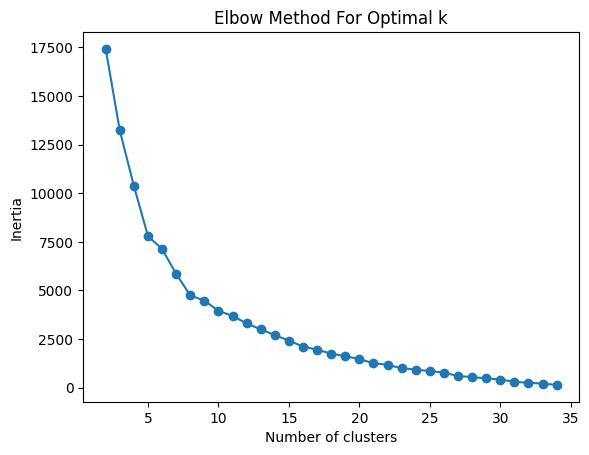

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(2, 35):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(class_mean)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(2, 35), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [6]:
class_mean = data.groupby('label_encoded').mean()

class_profiles = class_mean.reset_index()

k_optimal = 7 
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
class_profiles['cluster'] = kmeans.fit_predict(class_profiles)

label_to_cluster = class_profiles['cluster'].to_dict()

data['label_clustered'] = data['label_encoded'].map(label_to_cluster)

data.head()

,Rainfall (mm),Mean Temp. (*C),RHmean (%),SShr (hrs),WD (deg),WS (Km/hr),label_encoded,Zone_Barisal,Zone_Bogra,Zone_Chittagonj,...,Month_March,Month_May,Month_November,Month_October,Month_September,Week_1,Week_2,Week_3,Week_4,label_clustered
1,63.3,29.3,83.6,35.0,137.0,6.3,0,False,True,False,...,False,False,False,False,False,True,False,False,False,1
4,73.5,29.1,83.0,32.0,159.0,5.9,0,False,False,False,...,False,False,False,False,False,False,True,False,False,1
5,96.0,29.2,83.0,31.0,121.0,3.7,0,False,False,False,...,False,False,False,False,False,False,False,False,True,1
6,84.5,29.0,85.5,32.0,180.0,5.6,0,False,False,False,...,False,False,False,False,False,False,False,False,True,1
7,76.5,29.1,85.6,31.0,170.0,6.5,0,False,False,False,...,False,False,False,False,False,False,False,True,False,1


In [7]:
print(data.groupby('label_clustered')['label_encoded'].nunique())
cluster_mapping = data.groupby('label_clustered')['label_encoded'].unique()
print(cluster_mapping[3])


label_clustered
0     3
1     2
2     4
3    14
4     3
5     8
6     6
Name: label_encoded, dtype: int64
[20 18 29 34 35 26 27 24 31 32 37 28 33 30]


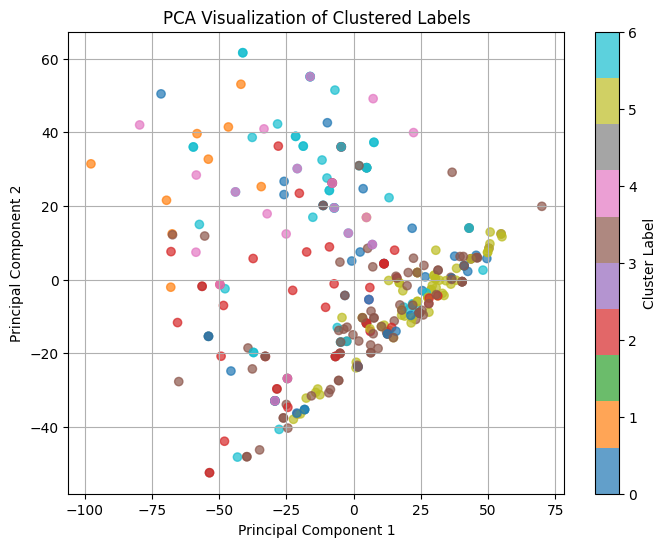

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numeric_cols = ['Rainfall (mm)','Mean Temp. (*C)', 'RHmean (%)', 'SShr (hrs)', 'WD (deg)', 'WS (Km/hr)']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[numeric_cols])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                      c=data['label_clustered'], cmap='tab10', alpha=0.7)
plt.title('PCA Visualization of Clustered Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


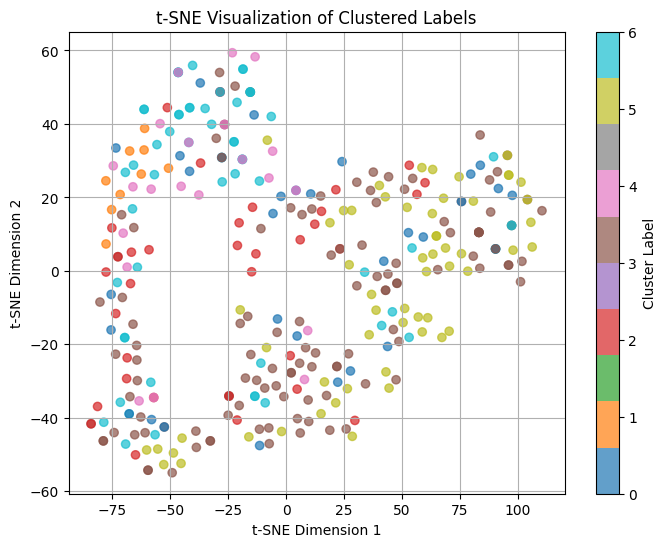

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(data[numeric_cols])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], 
                      c=data['label_clustered'], cmap='tab10', alpha=0.7)
plt.title('t-SNE Visualization of Clustered Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


In [12]:
data.columns
data.drop(columns=['label_encoded'], axis=1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.drop(['label_clustered'],axis=1)
y = data['label_clustered']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax'),
    # 'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

In [16]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'weighted')
    recall = recall_score(y_test, y_pred,average = 'weighted')
    f1 = f1_score(y_test, y_pred,average = 'weighted')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1

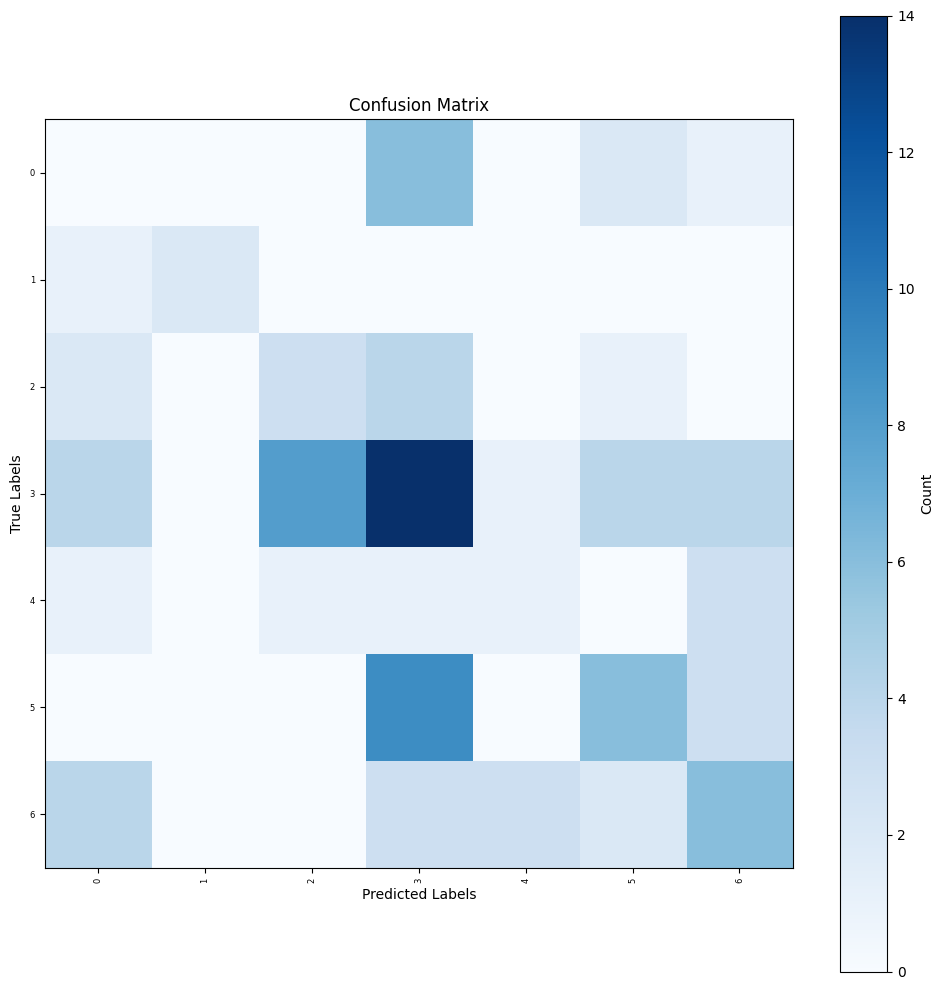

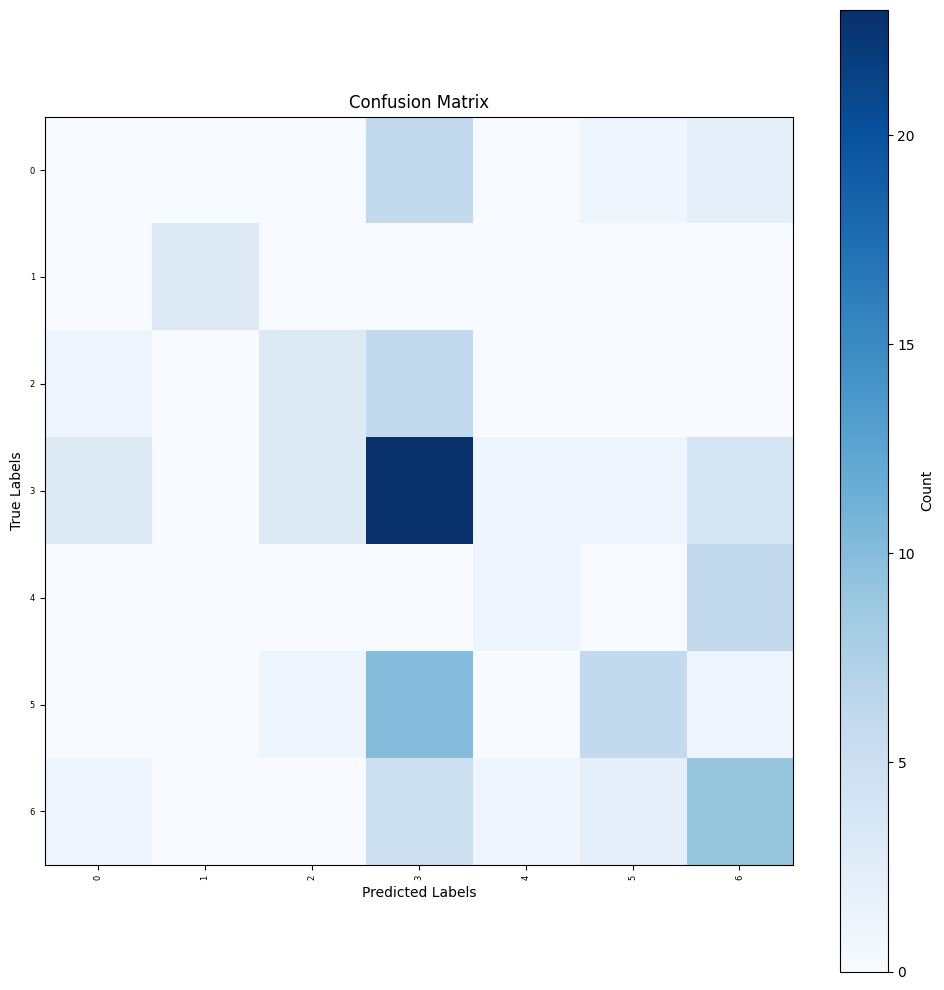

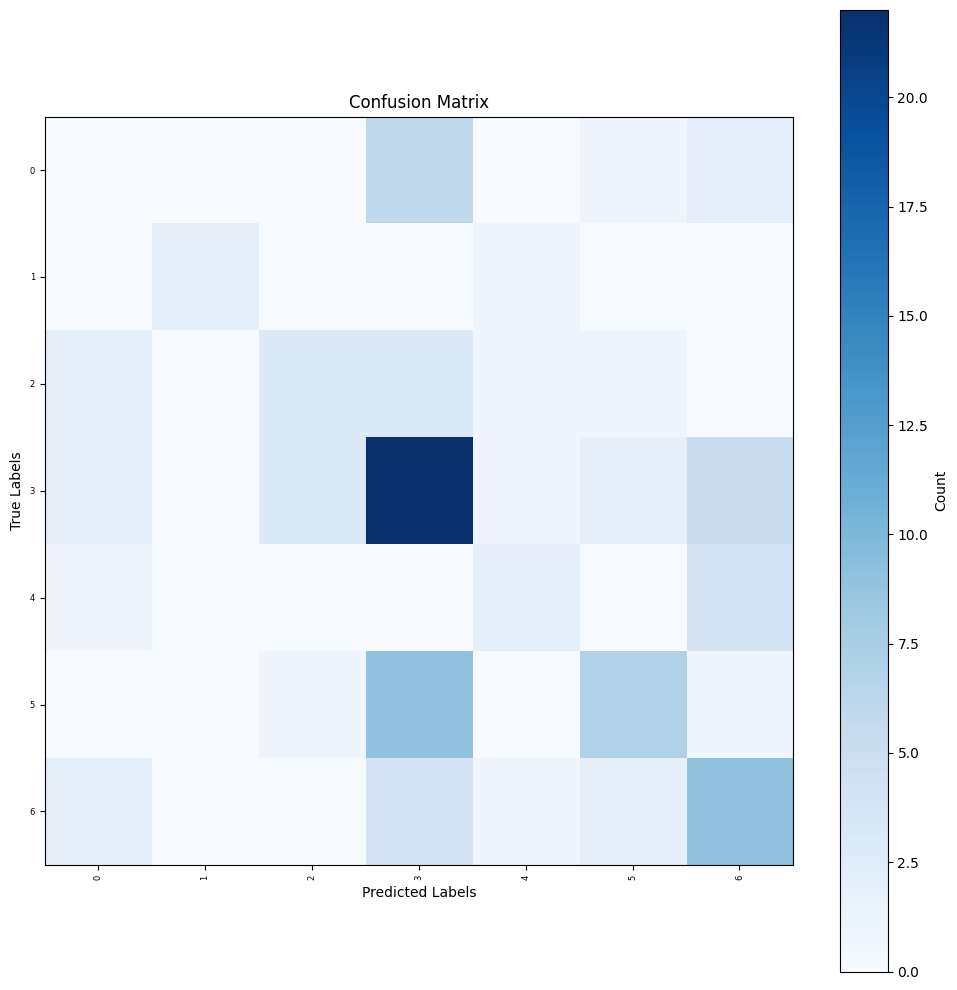

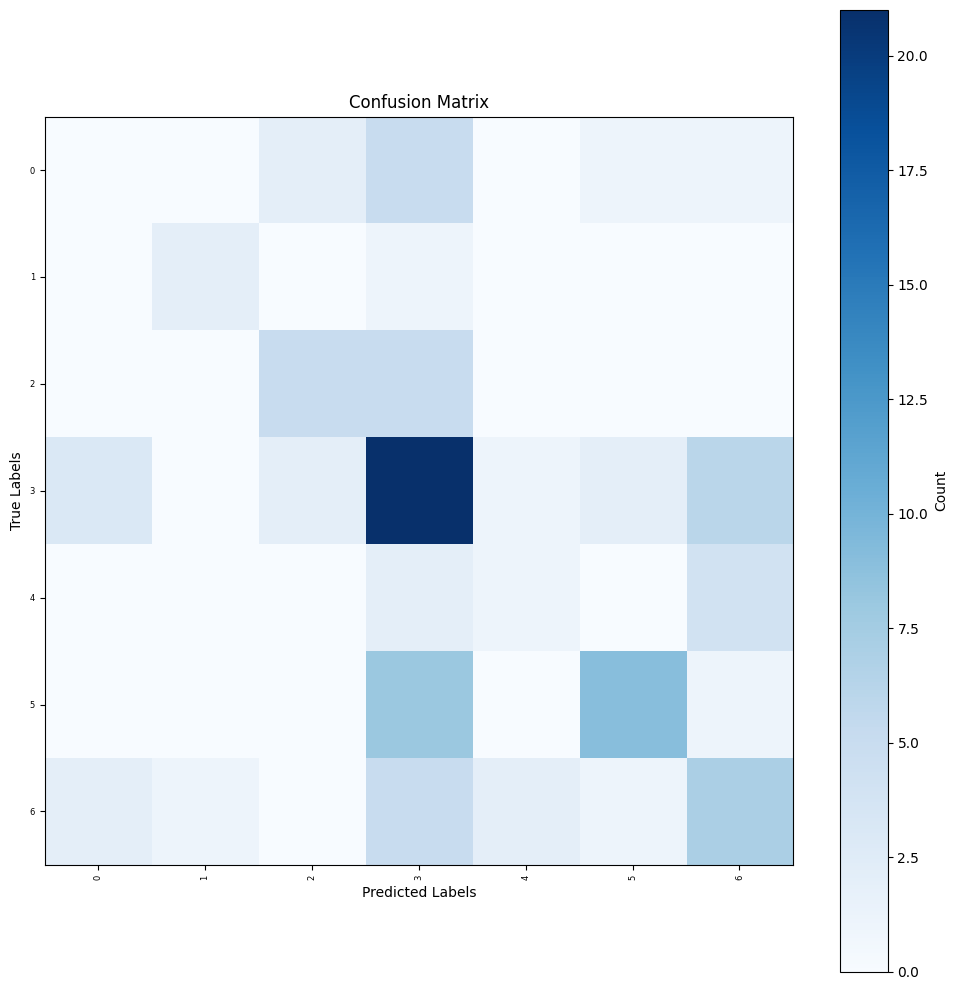

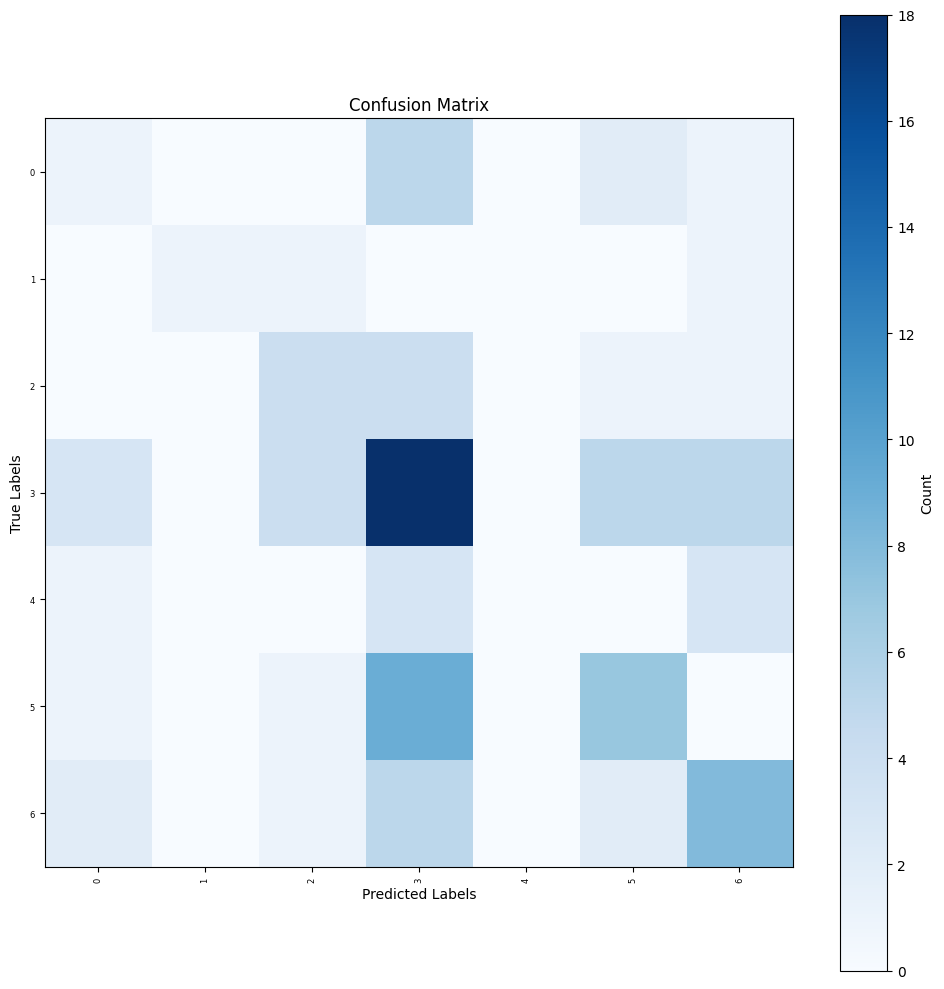

Learning rate set to 0.073445
0:	learn: 1.9044093	total: 179ms	remaining: 2m 58s
1:	learn: 1.8456192	total: 185ms	remaining: 1m 32s
2:	learn: 1.7997931	total: 190ms	remaining: 1m 3s
3:	learn: 1.7565021	total: 195ms	remaining: 48.5s
4:	learn: 1.7218629	total: 199ms	remaining: 39.5s
5:	learn: 1.6874782	total: 202ms	remaining: 33.4s
6:	learn: 1.6577934	total: 204ms	remaining: 28.9s
7:	learn: 1.6327434	total: 206ms	remaining: 25.5s
8:	learn: 1.6018705	total: 209ms	remaining: 23s
9:	learn: 1.5806698	total: 211ms	remaining: 20.9s
10:	learn: 1.5557566	total: 213ms	remaining: 19.1s
11:	learn: 1.5296532	total: 215ms	remaining: 17.7s
12:	learn: 1.5059839	total: 217ms	remaining: 16.5s
13:	learn: 1.4838671	total: 219ms	remaining: 15.4s
14:	learn: 1.4671367	total: 221ms	remaining: 14.5s
15:	learn: 1.4459816	total: 225ms	remaining: 13.9s
16:	learn: 1.4240893	total: 228ms	remaining: 13.2s
17:	learn: 1.4056804	total: 231ms	remaining: 12.6s
18:	learn: 1.3894029	total: 234ms	remaining: 12.1s
19:	learn: 

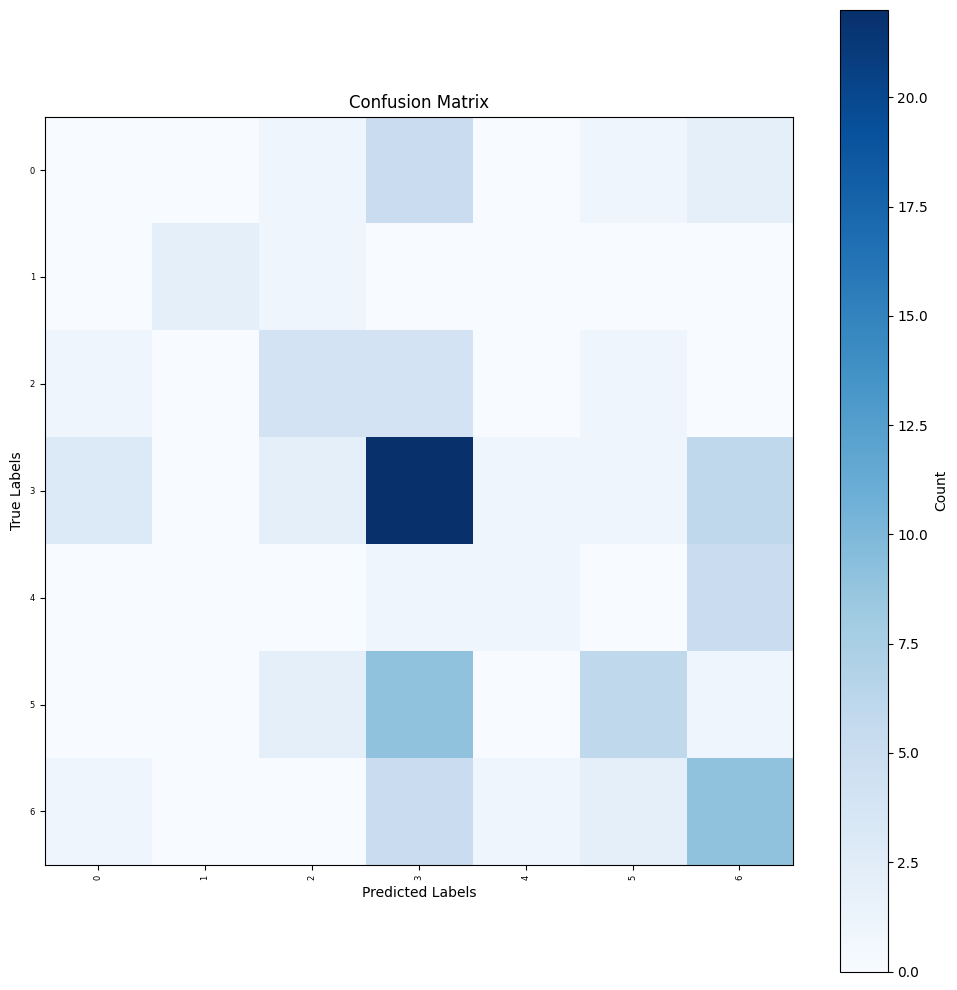

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 232, number of used features: 21
[LightGBM] [Info] Start training from score -2.355695
[LightGBM] [Info] Start training from score -3.654978
[LightGBM] [Info] Start training from score -2.268684
[LightGBM] [Info] Start training from score -1.040018
[LightGBM] [Info] Start training from score -2.674149
[LightGBM] [Info] Start training from score -1.757858
[LightGBM] [Info] Start training from score -1.709068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

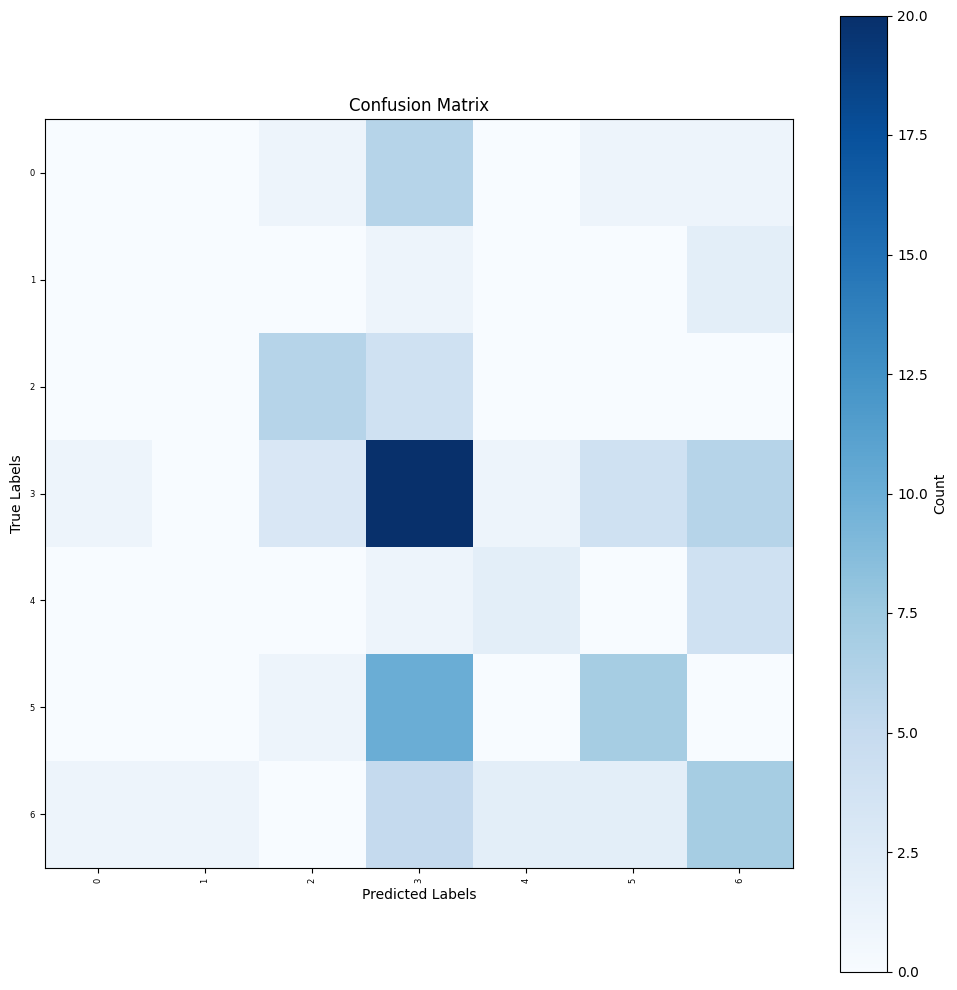

,Decision Tree,Random Forest,Gradient Boosting,HistGradientBoosting,KNN,CatBoost,LightGBM
Accuracy,0.320000,0.450000,0.450000,0.450000,0.390000,0.440000,0.420000
Precision,0.336962,0.438827,0.445256,0.440370,0.370703,0.429341,0.384482
Recall,0.320000,0.450000,0.450000,0.450000,0.390000,0.440000,0.420000
F1 Score,0.326219,0.426849,0.440137,0.437251,0.373015,0.421631,0.396274


In [17]:
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results)
results_data